In [6]:
# base
import matplotlib.pyplot as plt
import json
from const import *
def read_json(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data
def double(lis):
    res = []
    for tmp in lis:
        res.append(tmp)
        res.append(tmp)
    return res

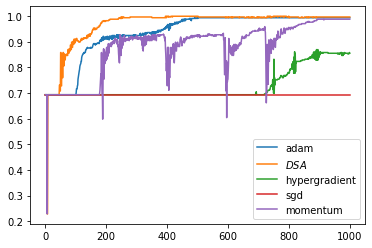

In [14]:
# plt small datasets' accu
dataset = CAR
path_template = "result/small/mlp_{}_{}_debug.json"
for opt in [ADAM, DSA, HD, SGD, MOMENTUM]:
    data = read_json(path_template.format(dataset, opt))[ACCU]
    if opt == DSA:
        data = double(data)
    x = [i + 1 for i in range(len(data))]
    label = opt
    if opt == DSA:
        label = "$DSA$"
    plt.plot(x,data,label=label)
plt.legend()
plt.show()

In [2]:
# resnet+hd+mnist: overfit
file_path = "result/large/resnet_MNIST_hypergradient_debug_1.json"
data = read_json(file_path)
train_loss = data[TRAINLOSS]
val_loss = data[VALLOSS]
accu = data[ACCU]
epochs = [i + 1 for i in range(len(train_loss))]

fig, axs = plt.subplots()
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.plot(epochs,accu)
# plt.scatter(epochs, train_loss, c=epochs, cmap="hot", label="Train loss", s=2)
plots = []
plots.append(plt.plot(epochs, train_loss, c="b", label="Train loss"))
plots.append(plt.plot(epochs, val_loss, c="r", label="Validation loss"))
# plt.legend(fontsize=10)
plt.twinx()
plots.append(plt.plot(epochs, accu, c="g", label="Test accuracy"))
fig.legend(fontsize=10, loc=(120/200, 1/2))

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'result/large/resnet_MNIST_hypergradient_debug_1.json'